In [84]:
import moench.moench as moench
import numpy as np
from tqdm import tqdm

In [78]:
import matplotlib.pyplot as plt

In [79]:
%matplotlib inline

## load data
calibration data was taken from the floureszence signal of a germanium wafer and a nickel foil

In [126]:
datapath = '/scratch/2022_03_28/moench_calib_ge/moench_calib_ge__0.clust'
gainmap = np.ones(shape=(400,400))
proc = moench.ClusterFileProcessor(gainmap)
hist_ge = proc.process_file(datapath, 1, 10000, 200)
print(hist.sum())

4612235


In [160]:
datapath = '/scratch/2022_03_28/moench_calib_ni/moench_calib_ni__0.clust'
gainmap = np.ones(shape=(400,400))
proc = moench.ClusterFileProcessor(gainmap)
hist_ni = proc.process_file(datapath, 1, 10000, 200)
print(hist.sum())

4612235


## preview data

In [161]:
image_ge = hist_ge.sum(axis=0)
image_ni = hist_ni.sum(axis=0)

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(image_ge, clim=(0, 3 * median))
fig.colorbar(im)
ax.grid(False)
ax.axis('off')

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(image_ni, clim=(0, 3 * median))
fig.colorbar(im)
ax.grid(False)
ax.axis('off')

(-0.5, 399.5, 399.5, -0.5)

In [164]:
energy_hist_ge = hist_ge.sum(axis=(1,2))
energy_hist_ni = hist_ni.sum(axis=(1,2))

fig, ax = plt.subplots(dpi=150)
ax.plot(energy_hist_ni)
ax.plot(energy_hist_ge)
ax.set_yscale('log')

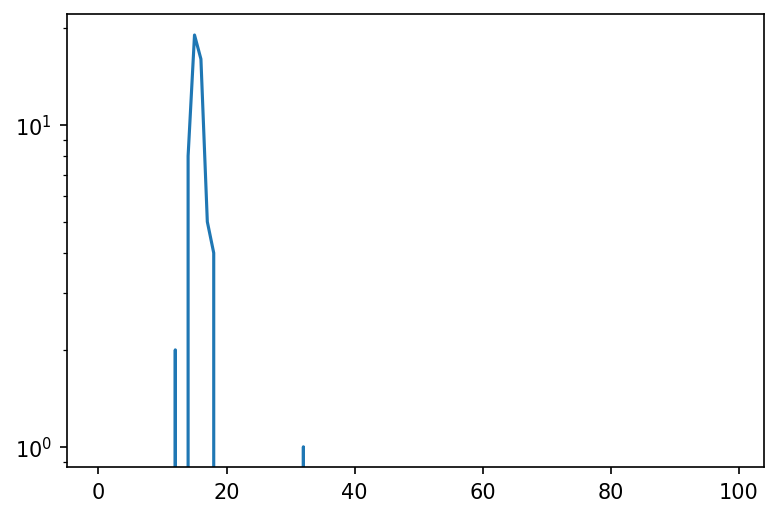

In [72]:
this_data = hist_ni[:,140,200]

fig, ax = plt.subplots(dpi=150)
ax.plot(this_data)
ax.set_yscale('log')

histograms of individual pixels dont contain that many photons, so im gonna use more data

In [129]:
gainmap = np.ones(shape=(400,400))
proc = moench.ClusterFileProcessor(gainmap)

def read_raw_data(element, filenum):
    """
    element: 'ni' or 'ge'
    filenum: number 0 to 98
    """
    datapath = f'/scratch/2022_03_28/moench_calib_{element}/moench_calib_{element}__{filenum}.clust'
    return proc.process_file(datapath, 1, 10000, 200)


# this breaks, when one of the files is missing
#fullhist_ge = read_raw_data('ge', 0)
#for i in tqdm(np.arange(1, 99)):
#    fullhist_ge += read_raw_data('ge', i)

fullhist_ge = np.zeros_like(hist_ge)
dir_to_read = '/scratch/2022_03_28/moench_calib_ni'
for f in tqdm([f for f in os.listdir(dir_to_read) if '.clust' in f]):
    datapath = f'{dir_to_read}/{f}'
    fullhist_ge += proc.process_file(datapath, 1, 10000, 200)

100%|██████████| 98/98 [06:07<00:00,  3.75s/it]


array([[346, 143],
       [324, 282],
       [236, 302],
       [232,  89],
       [359,  70],
       [ 99,  90],
       [301, 112],
       [ 83, 217],
       [ 86, 123],
       [271, 239]])

(25.0, 40.0)

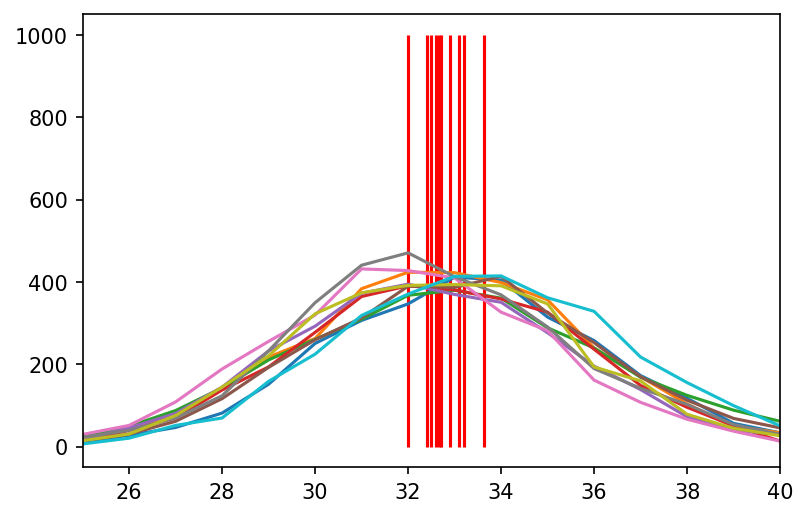

In [295]:
import scipy.signal as signal

def find_peak(spectrum):
    peak, peak_prop = signal.find_peaks(spectrum, prominence=100)
    if (len(peak) != 1):
        print(f'WARNING pixel has peaks: {peak}')
        #plt.plot(spectrum)
        return 0
    peak = peak[0]
    #signal.peak_widths(spectrum, peak[0], )
    
    #left, right = (peak_prop['left_bases'][0], peak_prop['right_bases'][0])
    left, right = (peak-10, peak+10)
    positions = np.arange(left, right)
    try:
        com = np.sum(positions*this_data[left:right])/np.sum(this_data[left:right])
    except:
        print('com could not be determined')
        return 0
    return com

np.random.seed(1234)
coordinates = np.random.randint(0, 400, (10,2))

fig, ax = plt.subplots(dpi=150)
for i in range(coordinates.shape[0]):
    this_data = fullhist_ge[:,coordinates[i, 0], coordinates[i, 1]]
    ax.plot(this_data)
    com = find_peak(this_data)
    # print(peak)
    ax.vlines(com, 0, 1e3, 'r')
    
#ax.set_yscale('log')
# ax.set_xlim((10, 60))
ax.set_xlim((25, 40))

In [296]:
peak_posistions = np.apply_along_axis(find_peak, 0, fullhist_ge)

WARNING pixel has peaks: [26 31]
WARNING pixel has peaks: [29 31]
WARNING pixel has peaks: [28 30]
WARNING pixel has peaks: [28 31]
WARNING pixel has peaks: [28 30]
WARNING pixel has peaks: [26 30]
WARNING pixel has peaks: [29 31]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [30 32]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING p

In [281]:
len(peak_posistions)

160000

In [297]:
ne, nx, ny = fullhist_ge.shape
print(np.moveaxis(fullhist_ge, 0, 2).reshape(nx*ny, ne).shape)

peak_positions = list(map(find_peak, np.moveaxis(fullhist_ge, 0, 2).reshape(nx*ny, ne)))

(160000, 200)
WARNING pixel has peaks: [26 31]
WARNING pixel has peaks: [29 31]
WARNING pixel has peaks: [28 30]
WARNING pixel has peaks: [28 31]
WARNING pixel has peaks: [28 30]
WARNING pixel has peaks: [26 30]
WARNING pixel has peaks: [29 31]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [30 32]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: []
WARNING pixel has peaks: [32 34]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks: []
WARNING pixel has peaks: [31 33]
WARNING pixel has peaks

In [310]:
# plt.plot(peak_positions)
gainmap = (9.85 / np.asarray(peak_positions).reshape(nx, ny))
gainmap[np.isinf(gainmap)] = 0

/home/spec_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [311]:
gainmap[-1,-1]

0.0

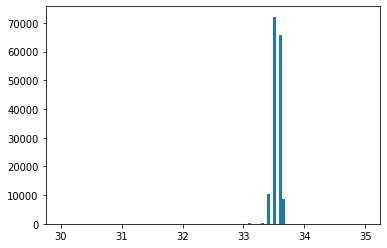

In [334]:
plt.hist(peak_positions, bins=np.linspace(30,35,100));

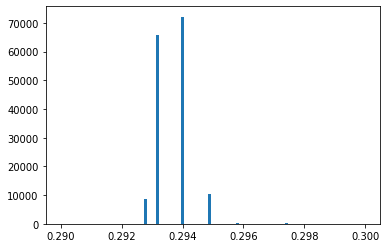

In [330]:
plt.hist(gainmap.ravel(), bins=np.linspace(0.28, 0.3, 100));

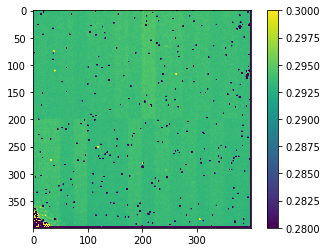

In [323]:
plt.imshow(gainmap, vmin=0.28, vmax=0.30)
plt.colorbar()

ValueError: supplied range of [0.2925431126250798, inf] is not finite

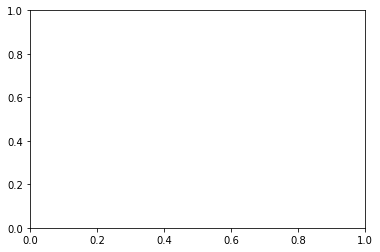

In [308]:
plt.hist(gainmap.ravel())